In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
import warnings
warnings.filterwarnings('ignore')

### 1.Introduction & Problem Statement

**Dataset Columns Description**

| Column                  | Description                                  |
|-------------------------|----------------------------------------------|
| **loan_id**             | Unique loan application ID (not for training) |
| **no_of_dependents**    | Number of dependents of the applicant         |
| **education**           | Applicant's education level                   |
| **self_employed**       | Whether the applicant is self-employed (Y/N)  |
| **income_annum**        | Applicant's annual income                     |
| **loan_amount**         | Requested loan amount                         |
| **loan_term**           | Loan repayment period (months)                |
| **cibil_score**         | Applicant's credit score                      |
| **residential_assets_value** | Value of residential property            |
| **commercial_assets_value**  | Value of commercial property             |
| **luxury_assets_value**      | Value of luxury assets (car, jewelry)    |
| **bank_asset_value**    | Value of bank savings/deposits                |
| **loan_status**         | Target column (Approved/Rejected)             |
**bold text**

### 2.Dataset Overview

In [13]:
df = pd.read_csv('data/loan.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [15]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [18]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [19]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()


In [20]:
catigorical_cols = [col for col in df.columns if df[col].dtype == 'O']
for col in catigorical_cols:
    print(f'{col} : {df[col].unique()}')

education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']


In [21]:
for col in catigorical_cols:
  print(df[col].value_counts()/len(df)*100)
  print()

education
 Graduate        50.222535
 Not Graduate    49.777465
Name: count, dtype: float64

self_employed
 Yes    50.363083
 No     49.636917
Name: count, dtype: float64

loan_status
 Approved    62.215976
 Rejected    37.784024
Name: count, dtype: float64



**Data Balance Check**

- **Education:** The distribution between **Graduate (50.2%)** and **Not Graduate (49.8%)** is almost equal.  
- **Self Employed:** The split between **Yes (50.4%)** and **No (49.6%)** is also balanced.  
- **Loan Status (Target Variable):** Although **Approved (62.2%)** is slightly higher than **Rejected (37.8%)**, the dataset is not heavily imbalanced.


### 3.Exploratory Data Analysis (EDA)

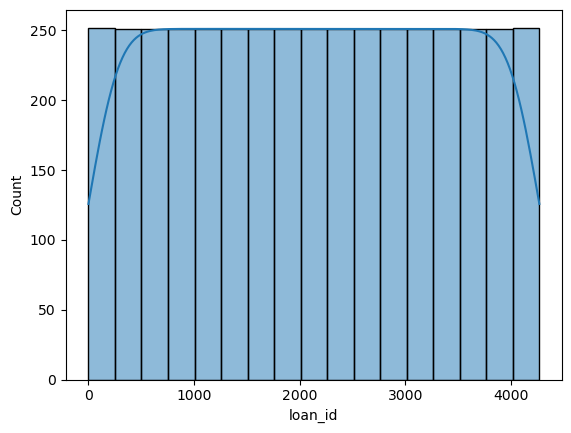

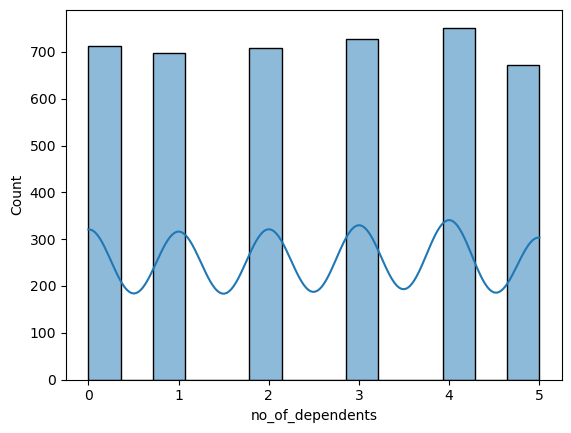

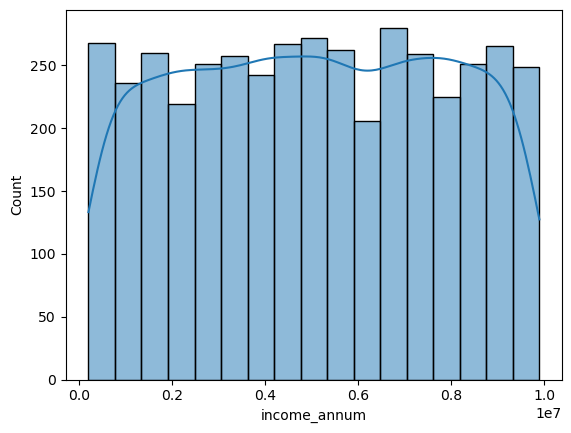

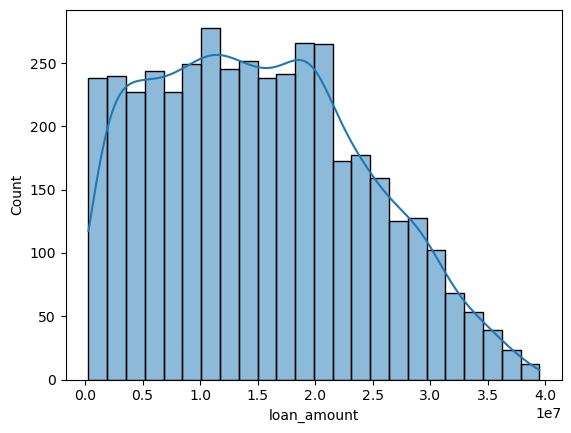

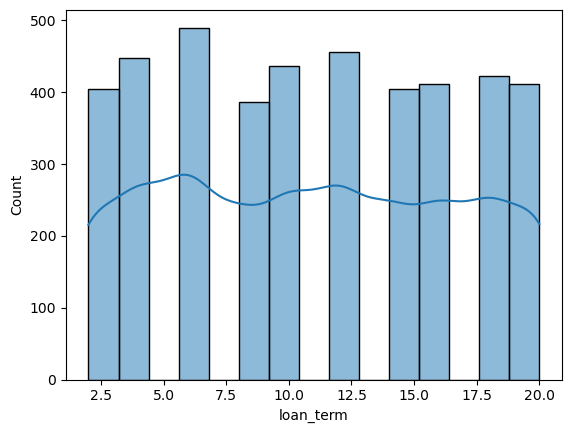

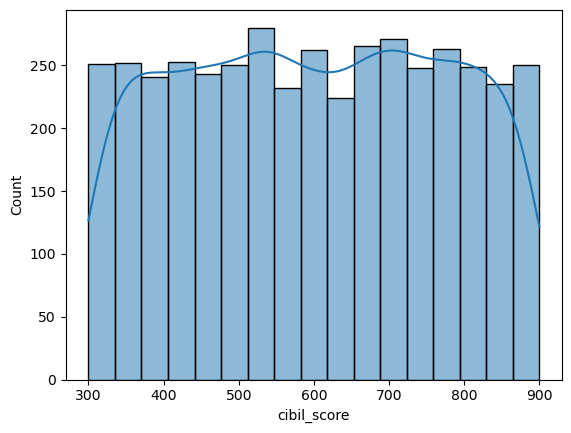

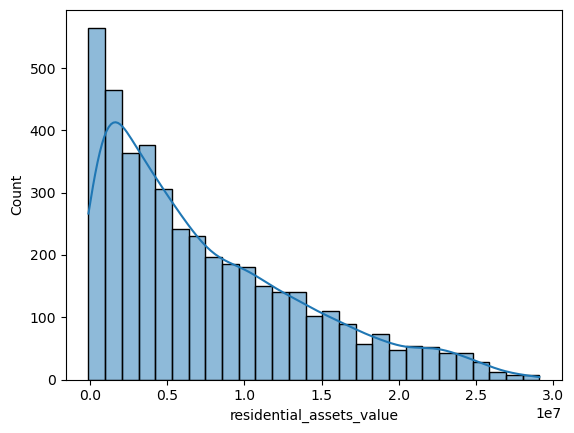

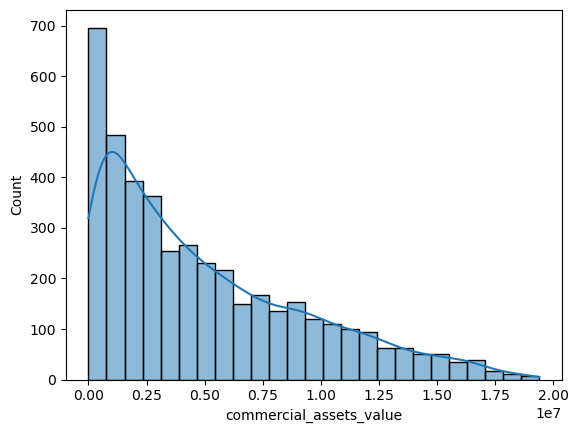

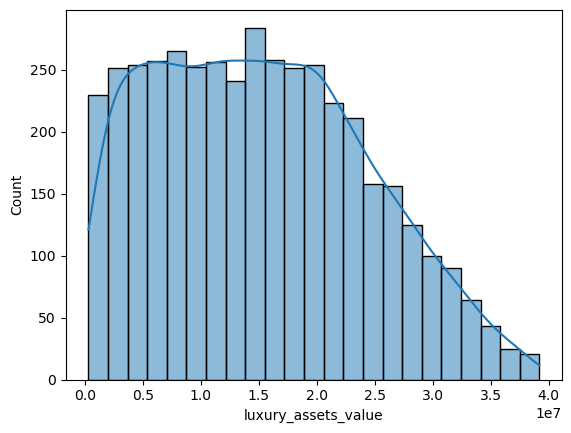

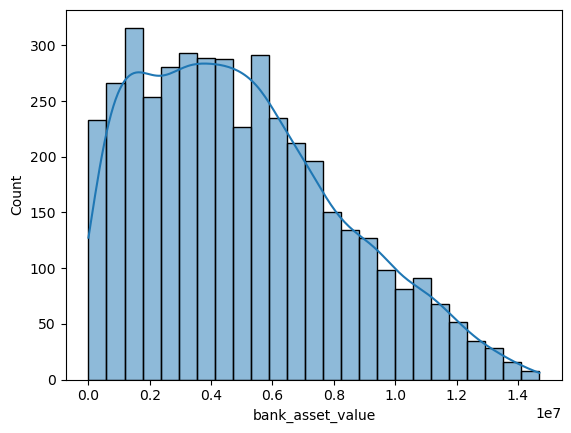

In [22]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_col:
        sns.histplot(df[col],kde=True)
        plt.show()

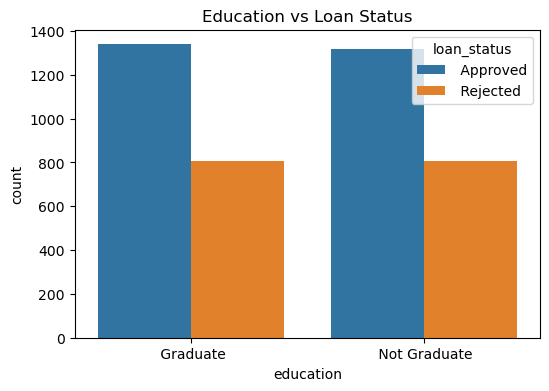

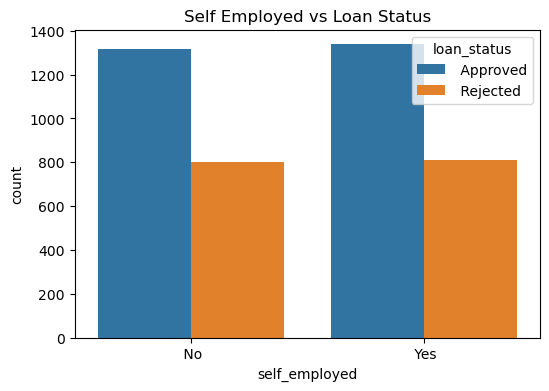

loan_status     Approved   Rejected
education                          
 Graduate      62.453358  37.546642
 Not Graduate  61.976471  38.023529


In [23]:
# 1. Categorical vs Target
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()

# Crosstab for percentages
edu_loan = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
print(edu_loan)


**Categorical vs Loan Status**

- **Education vs Loan Status:** Shows how loan approval differs between Graduates and Non-Graduates.  
- **Self Employed vs Loan Status:** Compares approval rates for self-employed vs non-self-employed applicants.  
- **Crosstab Table:** Shows percentages of Approved/Rejected loans for each education category to see trends clearly.


<AxesSubplot: xlabel='no_of_dependents', ylabel='count'>

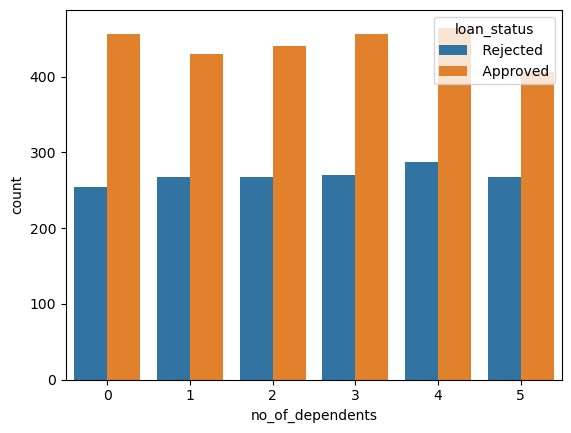

In [24]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status')

**Dependents vs Loan Status:** The graph shows that having more dependents slightly increases the chance of loan rejection, but the number of approved loans stays almost the same. This means our assumption that more dependents lead to fewer approvals isn't strongly supported by the data.

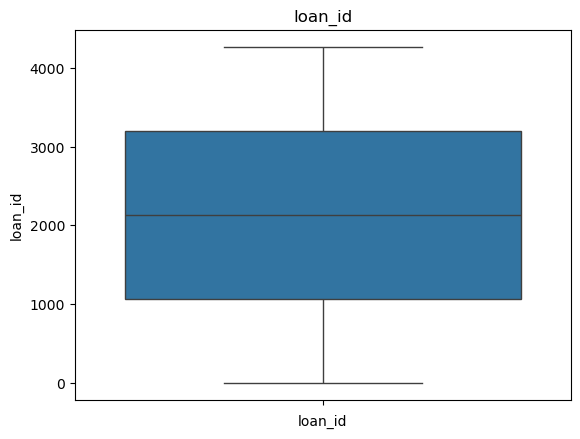

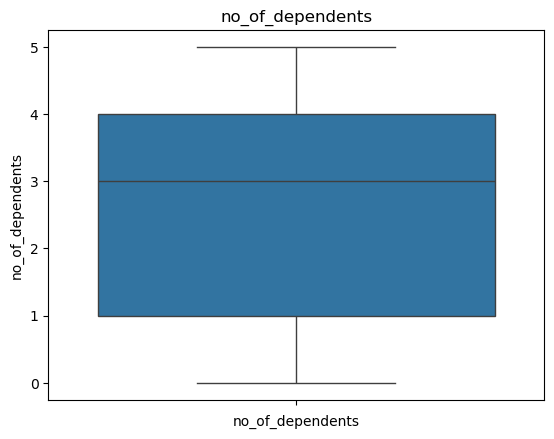

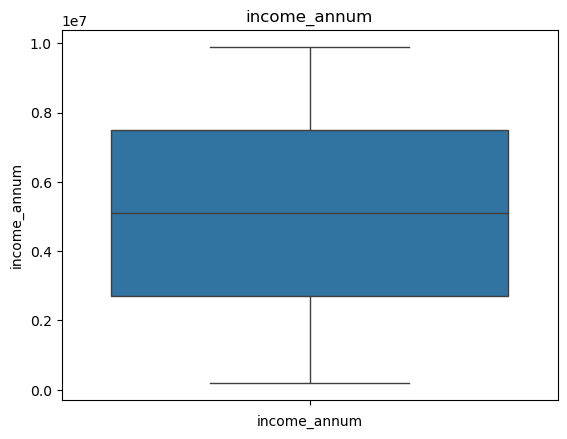

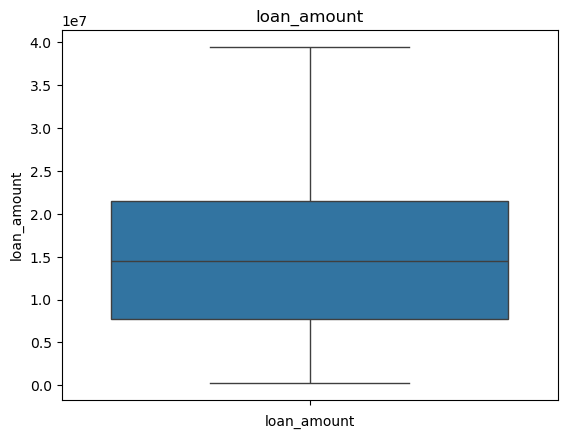

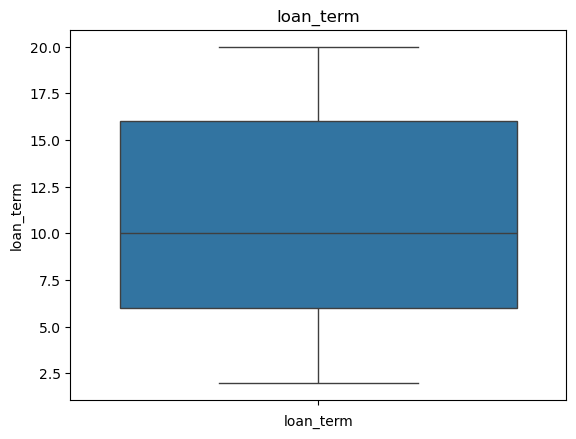

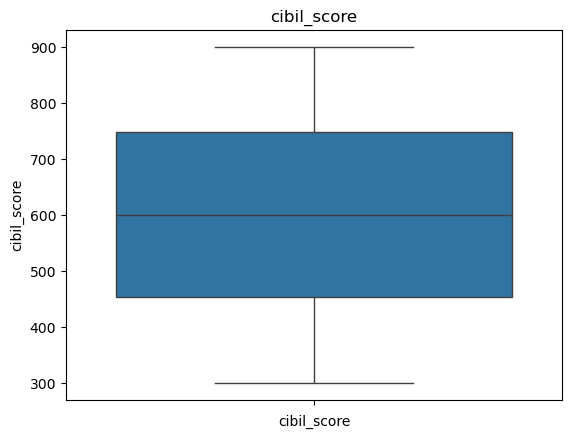

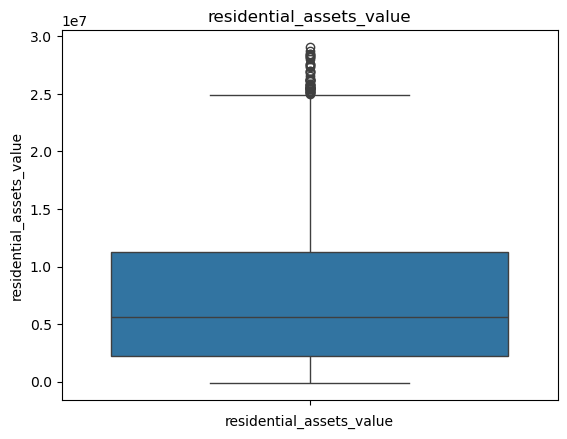

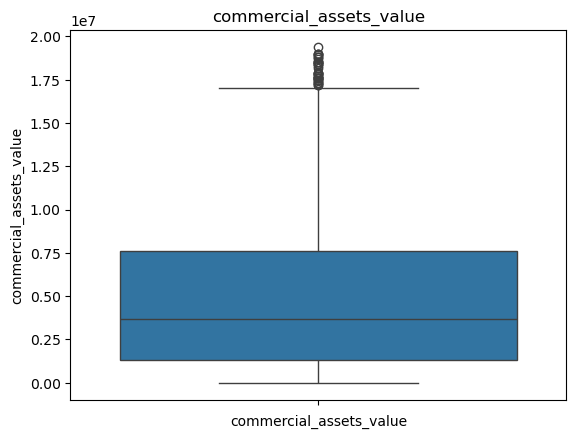

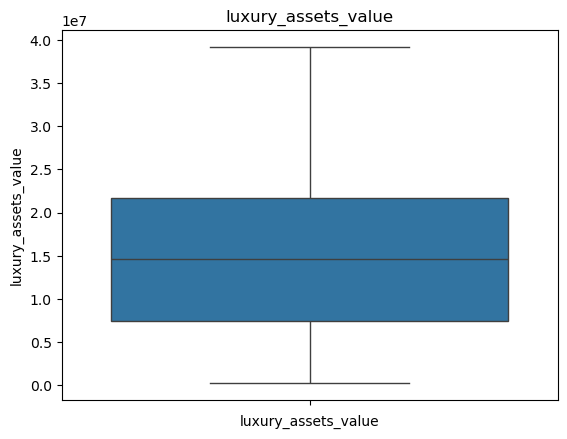

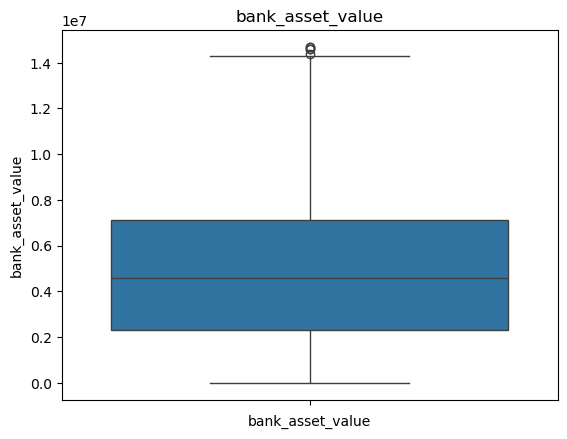

In [25]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_col:
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.show()

### 4. Data Preprocessing¶

In [26]:
df = df.drop(columns=['loan_id'])

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catigorical_cols:
  df[col] = le.fit_transform(df[col])


<AxesSubplot: >

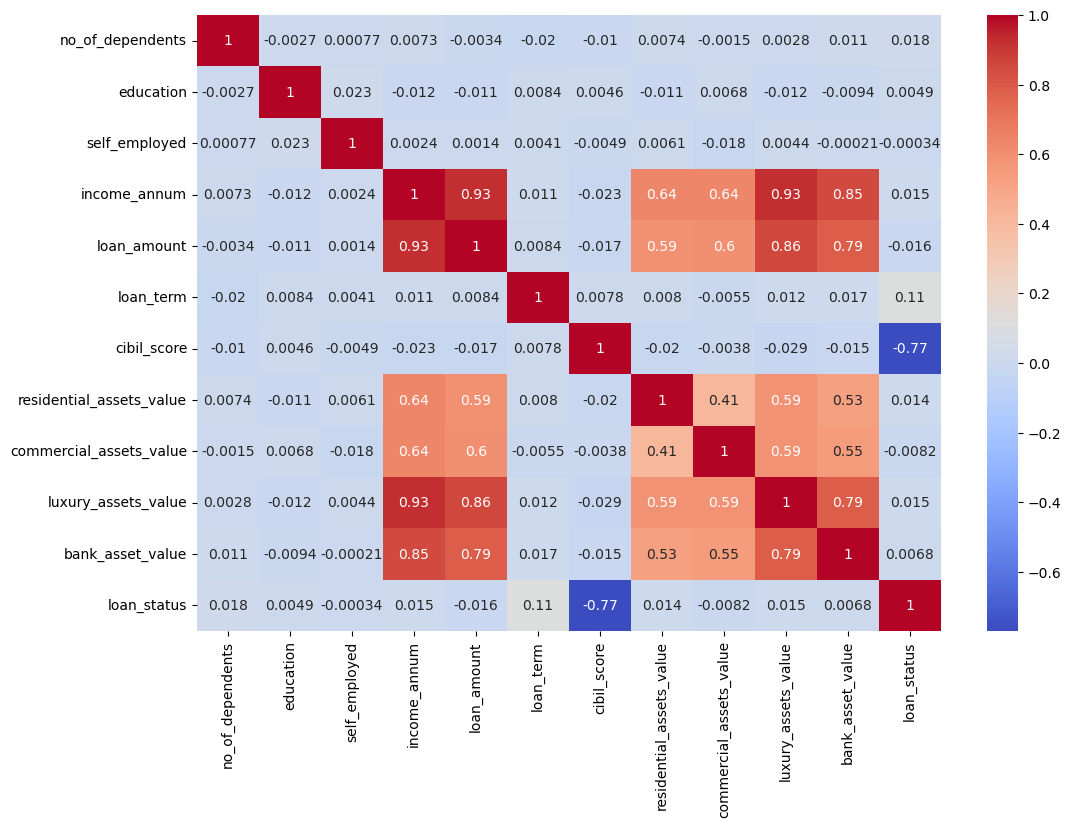

In [28]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [29]:
# Example: Debt-to-Income Ratio
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df= df.drop(columns=['loan_amount','income_annum'])

**Feature Engineering: Debt-to-Income Ratio**

We created a new feature `debt_to_income` by dividing the `loan_amount` by the `income_annum`. This new feature provides a more meaningful representation of the applicant's financial burden compared to using the raw `loan_amount` and `income_annum` separately.


<AxesSubplot: >

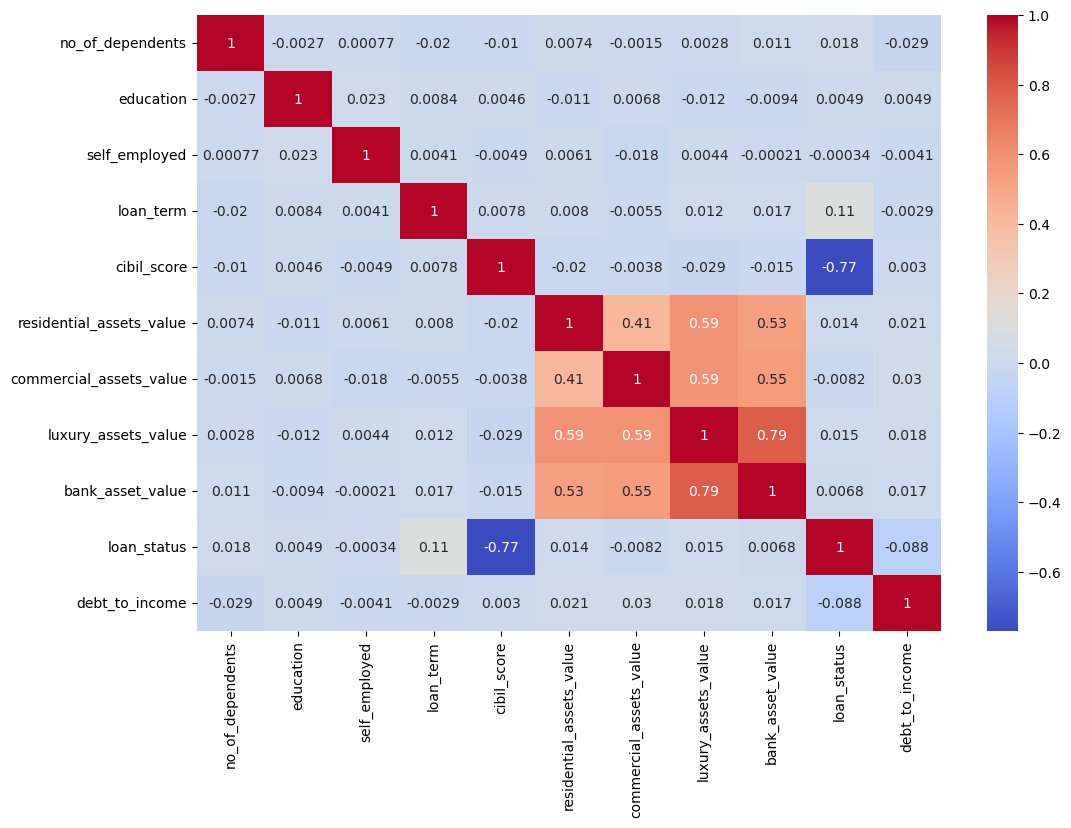

In [30]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [31]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
numerical_col

Index(['no_of_dependents', 'education', 'self_employed', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'debt_to_income'],
      dtype='object')

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income
0,0.4,0.0,0.0,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0,0.645833
1,0.0,1.0,1.0,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0,0.590244
2,0.6,0.0,0.0,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1.0,0.705495
3,0.6,0.0,0.0,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1.0,0.897561
4,1.0,1.0,1.0,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0,0.387755


In [33]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.Model Selection & Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

***Mean CV Accuracy vs Test Accuracy***

**Mean CV Accuracy:**  
Represents the average accuracy of the model across multiple training-validation splits during cross-validation. It helps evaluate how well the model performs on different subsets of the training data.

**Test Accuracy:**  
Indicates the accuracy of the model on the separate test set that was not used during training or cross-validation. It reflects the model's generalization performance on unseen data.

**Comparison:**  
- If Mean CV Accuracy is close to Test Accuracy, the model generalizes well.
- A large gap between them may indicate overfitting or underfitting.


In [36]:
# Cross-validation on training data
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.90629575 0.90775988 0.9238653  0.91654466 0.93850659]
Mean CV accuracy: 0.9185944363103953 

Test Accuracy: 0.8992974238875878


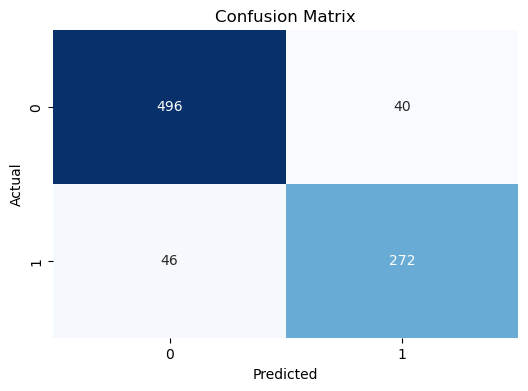

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       536
         1.0       0.87      0.86      0.86       318

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854



In [39]:
# Cross-validation on training data
model = DecisionTreeClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.99121523 0.98828697 0.9897511  0.99267936 0.99707174]
Mean CV accuracy: 0.9918008784773059 

Test Accuracy: 0.9941451990632318


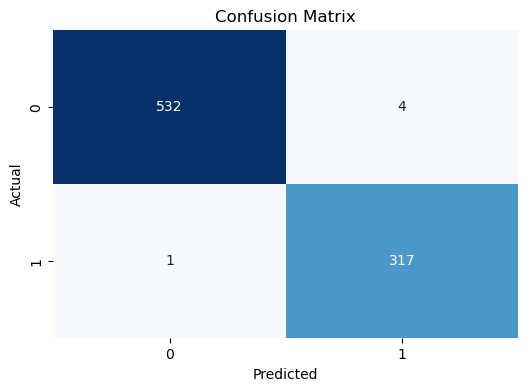

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       536
         1.0       0.99      1.00      0.99       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [42]:
# Cross-validation on training data
model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.99560761 0.99560761 0.99414348 0.99560761 0.99560761]
Mean CV accuracy: 0.9953147877013178 

Test Accuracy: 0.9988290398126464


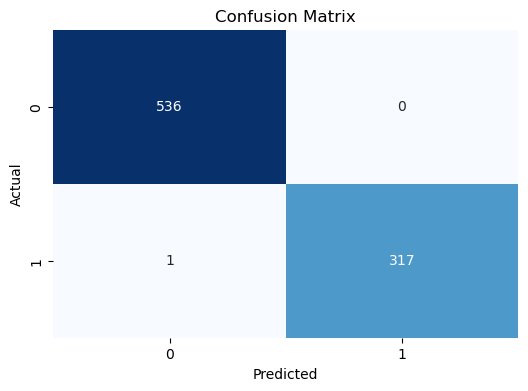

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       536
         1.0       1.00      1.00      1.00       318

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



In [45]:
# Cross-validation on training data
model = KNeighborsClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean(),'\n')

# Train model on full training data
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.90775988 0.89604685 0.93118594 0.91508053 0.91947291]
Mean CV accuracy: 0.9139092240117129 

Test Accuracy: 0.9192037470725996


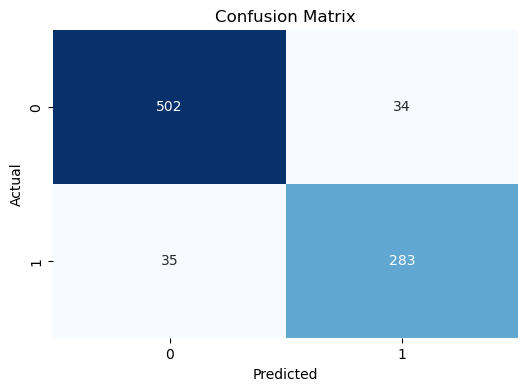

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       536
         1.0       0.89      0.89      0.89       318

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



### Model Evaluation: RandomForestClassifier

The RandomForestClassifier achieved the highest performance among all tested models:

- **Cross-validation scores**: [0.9956, 0.9956, 0.9941, 0.9956, 0.9971]
- **Mean CV accuracy**: 0.9956
- **Test Accuracy**: 0.9988

The small gap between the cross-validation accuracy and test accuracy indicates that the model generalizes well and does not overfit. This consistent and high performance makes RandomForestClassifier the best choice for this classification task.


In [48]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Example dataset
X, y = load_iris(return_X_y=True)

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save model as pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl
